In [1]:
# Importing usefull libraries and supressing the warning messages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.append("..")
warnings.filterwarnings('ignore')

In [2]:
# Importing some scripts

from scripts.data_vizualization import Data_Viz 
from scripts.data_cleaning import DataCleaner
from scripts.data_transformation import DataTransformer

DC = DataCleaner()
DV = Data_Viz()
DT = DataTransformer()

In [3]:
# Reading the datasets

train_data = pd.read_csv('../data/train_store.csv')
test_data = pd.read_csv('../data/test_store.csv')

#### 1. Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

In [4]:
# Finding out the total promotion percentage in both the training and test dataset

promo_test_percentage = test_data['Promo'].value_counts(0)[1]/(test_data['Promo'].value_counts(0)[1]+test_data['Promo'].value_counts(0)[0])
promo_train_percentage = train_data['Promo'].value_counts(0)[1]/(train_data['Promo'].value_counts(0)[1]+train_data['Promo'].value_counts(0)[0])

In [5]:
# Printing the number of percentages

print(f'There are {promo_test_percentage:.2%} of promotion in the test data set ')
print(f'There are {promo_train_percentage:.2%} of promotion in the train data set ')

There are 39.58% of promotion in the test data set 
There are 38.15% of promotion in the train data set 


In [6]:
# Creating a test and train promo data frame for visualization

promo_test_df = test_data['Promo'].value_counts()
promo_train_df = train_data['Promo'].value_counts()

In [7]:
# Creating a data frame for visualization

test_df = pd.DataFrame(promo_test_df)
train_df = pd.DataFrame(promo_train_df)

In [8]:
# Renaming the columns for visualization

promo = [0,1]
test_df['Promotion'] = promo
train_df['Promotion'] = promo
test_df.rename(columns={'Promo':'Count'},inplace=True)
train_df.rename(columns={'Promo':'Count'},inplace=True)

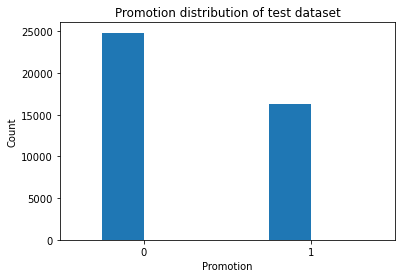

In [9]:
# Plotting the test promo distribution 

test_df.plot(kind='bar',rot=0)
plt.xlabel('Promotion')
plt.ylabel('Count')
plt.title('Promotion distribution of test dataset')
plt.gca().get_legend().remove()
plt.savefig('../charts/test_dataset_promo_distribution.png')

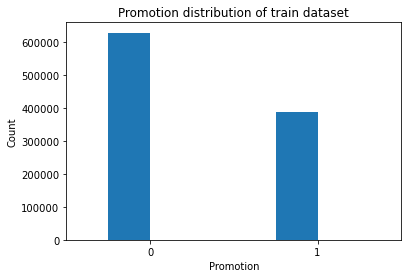

In [10]:
# Plotting the train promo distribution 

train_df.plot(kind='bar',rot=0)
plt.xlabel('Promotion')
plt.ylabel('Count')
plt.title('Promotion distribution of train dataset')
plt.gca().get_legend().remove()
plt.savefig('../charts/train_dataset_promo_distribution.png')

##### From the above graphs and percentage prints we can see that the promotion is distributed in both the train and test data similarly

In [11]:
# Finding out the state holiday field

train_data['StateHoliday'].value_counts().index.tolist()

['0', 0, 'a', 'b', 'c']

In [12]:
# Changing all the fields of the state holiday into string

train_data['StateHoliday'] = train_data['StateHoliday'].values.astype(str)
train_data['StateHoliday'].value_counts().index

Index(['0', 'a', 'b', 'c'], dtype='object')

In [13]:
# Changing the state holiday fields to easy understandable names
 
train_data['StateHoliday'].replace({'0':'No Holiday','a':'Public Holiday','b':'Easter Holiday','c':'Christmas Holiday'},inplace=True)

In [14]:
# Ensuring if the train data column values has changed

train_data['StateHoliday'].value_counts().index.tolist()

['No Holiday', 'Public Holiday', 'Easter Holiday', 'Christmas Holiday']

In [15]:
# Separating the date column for further analysis

DC.convert_to_datetime(train_data, ['Date'])
train_data['Year'] = train_data['Date'].apply(lambda x: x.year)
train_data['Month'] = train_data['Date'].apply(lambda x: x.month)
train_data['DayOfMonth'] = train_data['Date'].apply(lambda x: x.day)
train_data['Weekday'] = train_data['DayOfWeek'].apply(lambda x: 0 if (x in [6, 7]) else 1) # Identifying if the day is weekend or weekday

In [16]:
# Create a new analysed train_data

train_data.to_csv('../data/train_data_clean.csv',index=False)

#### 2. Check & compare sales behavior before, during and after holidays

In [17]:
# Reading the data and making the index the date to make it easier for the time series analysis

train = pd.read_csv('../data/train_data_clean.csv',index_col='Date')
test = pd.read_csv('../data/train_data_clean.csv',index_col='Date')

In [18]:
# Finding out all the easter holidays

easter_holiday_list = train['StateHoliday'].where(train['StateHoliday']=='Easter Holiday')
easter_holiday_list = easter_holiday_list.dropna()
print(f'These are the easter holidays from 2013-2015:\n {easter_holiday_list.index.unique().tolist()}')


These are the easter holidays from 2013-2015:
 ['2015-04-06', '2015-04-03', '2014-04-21', '2014-04-18', '2013-04-01', '2013-03-29']


In [19]:
# Finding out all the public holidays

public_holiday_list = train['StateHoliday'].where(train['StateHoliday']=='Public Holiday')
public_holiday_list = public_holiday_list.dropna()
print(f'These are the public holidays from 2013-2015:\n {public_holiday_list.index.unique().tolist()}')


These are the public holidays from 2013-2015:
 ['2015-06-04', '2015-05-25', '2015-05-14', '2015-05-01', '2015-01-06', '2015-01-01', '2014-11-19', '2014-11-01', '2014-10-31', '2014-10-03', '2014-06-19', '2014-06-09', '2014-05-29', '2014-05-01', '2014-01-06', '2014-01-01', '2013-11-20', '2013-11-01', '2013-10-31', '2013-10-03', '2013-08-15', '2013-05-30', '2013-05-20', '2013-05-09', '2013-05-01', '2013-01-06', '2013-01-01']


In [20]:
# Finding out all the Christmas holidays

christmas_holiday_list = train['StateHoliday'].where(train['StateHoliday']=='Christmas Holiday')
christmas_holiday_list = christmas_holiday_list.dropna()
print(f'These are the Christmas holidays from 2013-2015:\n {christmas_holiday_list.index.unique().tolist()}')

These are the Christmas holidays from 2013-2015:
 ['2014-12-26', '2014-12-25', '2013-12-26', '2013-12-25']


In [21]:
# Sales Comparision on State Holiday

train_store_holiday = train.groupby('StateHoliday').agg({'Sales': 'mean'})
train_store_holiday['StateHoliday'] = train_store_holiday.index

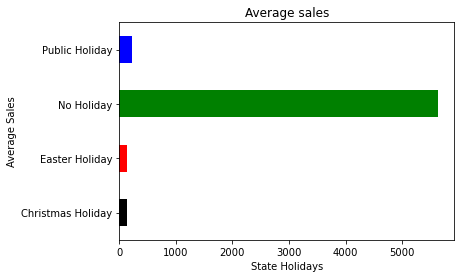

<Figure size 432x288 with 0 Axes>

In [22]:
# Plotting the average sales per State holidays

train_store_holiday.plot(kind='barh',x='StateHoliday',y='Sales',rot='0',color=['black', 'red', 'green', 'blue'])
plt.title('Average sales')
plt.xlabel('State Holidays')
plt.ylabel('Average Sales')
plt.gca().get_legend().remove() # Removing the legend since we are working on univariate analysis
plt.show()
plt.savefig('../charts/average_sales_analysis.jpg')

In [24]:
# Creating a date column from the index 

train['date'] = train.index
train['date'] = pd.to_datetime(train['date'])
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Sales                      1017209 non-null  float64       
 3   Customers                  1017209 non-null  float64       
 4   Open                       1017209 non-null  int64         
 5   Promo                      1017209 non-null  int64         
 6   StateHoliday               1017209 non-null  object        
 7   SchoolHoliday              1017209 non-null  int64         
 8   StoreType                  1017209 non-null  object        
 9   Assortment                 1017209 non-null  object        
 10  CompetitionDistance        1017209 non-null  float64       
 11  CompetitionOpenSinceMonth  101

In [31]:
# Creating the before after and during time stamp dataframe for 2014/15

before_index = (train["date"] >= pd.to_datetime("2014-11-25")) & (train["date"] < pd.to_datetime("2014-12-25")) # Taking the one month before xmass
before_xmass = train[before_index].groupby("date").agg({"Sales": "mean"})

during_index = (train["date"] >= pd.to_datetime("2014-12-25")) & (train["date"] < pd.to_datetime("2014-12-30")) # Thinking that the holiday will last for 6 days
during_xmass = train[during_index].groupby("date").agg({"Sales": "mean"})

after_index = (train["date"] >= pd.to_datetime("2015-01-01")) & (train["date"] < pd.to_datetime("2015-02-02"))# Taking the one month after xmass
after_xmass = train[after_index].groupby("date").agg({"Sales": "mean"})

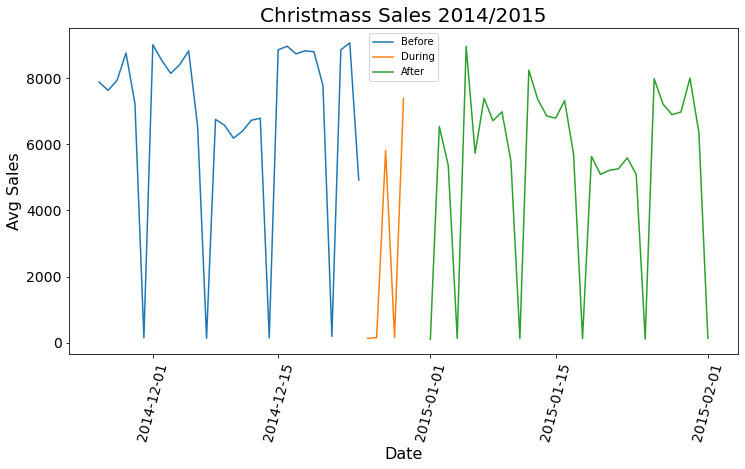

<Figure size 432x288 with 0 Axes>

In [33]:
# Plotting the graph of xmass sales before, after and during

plt.figure(figsize=(12, 6))

sns.lineplot(x = before_xmass.index, y = before_xmass["Sales"], label='Before')
sns.lineplot(x = during_xmass.index, y = during_xmass["Sales"], label='During')
sns.lineplot(x = after_xmass.index, y = after_xmass["Sales"], label='After')

plt.title("Christmass Sales 2014/2015", size=20)
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xlabel="Date", fontsize=16)
plt.ylabel(ylabel="Avg Sales", fontsize=16)
plt.show()
plt.savefig('../data/christmass_sales_analysis.jpg')
